# ***Engr.Muhammad Javed***

# 02. Padding and Stride

## 1. Theory: Controlling the Output Size
When we perform convolution, the spatial dimensions of the image naturally shrink with every layer (if filter size > 1). This is called the **border effect**.

### Padding ($P$)
To solve the shrinking problem, we can pad the input image with zeros around the border.
- **Valid Padding**: No padding. Dimensions decrease.
- **Same Padding**: Zero padding is added so that Output Size = Input Size (when Stride=1).

### Stride ($S$)
Stride is the step size the filter moves. 
- Stride 1: Overlapping windows, fine details.
- Stride > 1: Skips pixels, effectively downsamples the image immediately.

### Output Dimension Formula
For an input of size $W \times W$, Filter $F \times F$, Padding $P$, and Stride $S$:
$$ Output = \frac{W - F + 2P}{S} + 1 $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load Data
(train_images, _), (_, _) = mnist.load_data()
image = train_images[0]

print("Original Image Shape:", image.shape)

c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.0 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.0 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.0 at tensorflow/core/framework/resour

Original Image Shape: (28, 28)


## 2. Implementing Padding and Stride
We will implement a function that adds padding to the image and then convolves with a stride.

In [2]:
def convolve_with_padding_stride(image, kernel, stride=1, padding=0):
    # Add Padding
    if padding > 0:
        image_padded = np.pad(image, ((padding, padding), (padding, padding)), mode='constant')
    else:
        image_padded = image
        
    kernel_height, kernel_width = kernel.shape
    padded_height, padded_width = image_padded.shape
    
    # Calculate Output Dimensions
    # Formula: floor((W - F + 2P)/S) + 1
    # Note: 'image_padded' already includes 2P in its size typically, but here we just use its shape directly
    # image_padded dim is (H + 2P)
    
    output_height = (padded_height - kernel_height) // stride + 1
    output_width = (padded_width - kernel_width) // stride + 1
    
    feature_map = np.zeros((output_height, output_width))
    
    for i in range(0, output_height):
        for j in range(0, output_width):
            # Start indices in padded image based on stride
            # i * stride corresponds to the step
            try:
                row_start = i * stride
                col_start = j * stride
                
                roi = image_padded[row_start : row_start + kernel_height, 
                                   col_start : col_start + kernel_width]
                
                feature_map[i, j] = np.sum(roi * kernel)
            except:
                break
                
    return feature_map

## 3. Compare Results
We use a simple 3x3 averaging filter.

Valid Shape: (26, 26)
Same Shape: (28, 28)
Strided Shape: (14, 14)


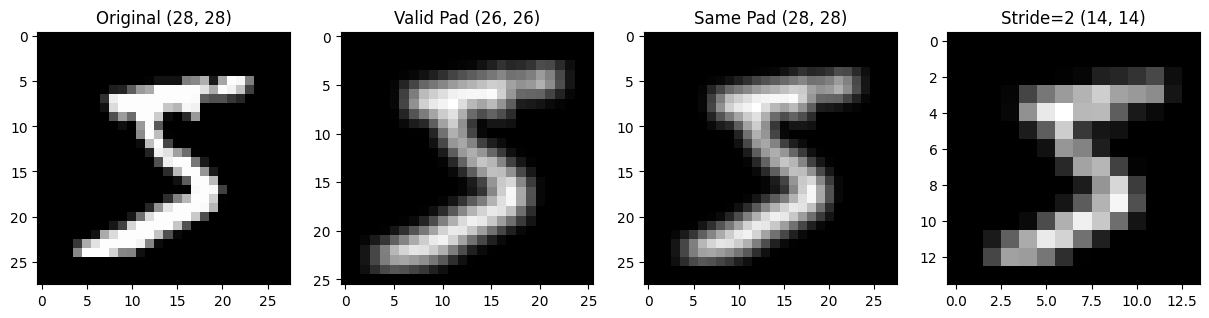

In [3]:
# Simple Box Filter 3x3
kernel = np.ones((3, 3)) / 9.0

# 1. Valid Padding (P=0), Stride=1
# Expected size: 28 - 3 + 1 = 26
out_valid = convolve_with_padding_stride(image, kernel, stride=1, padding=0)

# 2. Same Padding (P=1), Stride=1
# Expected size: (28 - 3 + 2*1) + 1 = 28
out_same = convolve_with_padding_stride(image, kernel, stride=1, padding=1)

# 3. Strided Convolution (P=1, S=2)
# Expected size: (28 - 3 + 2)/2 + 1 = 14.5 -> 14
out_strided = convolve_with_padding_stride(image, kernel, stride=2, padding=1)

print(f"Valid Shape: {out_valid.shape}")
print(f"Same Shape: {out_same.shape}")
print(f"Strided Shape: {out_strided.shape}")

plt.figure(figsize=(15, 5))
plt.subplot(1, 4, 1); plt.imshow(image, cmap='gray'); plt.title(f'Original {image.shape}')
plt.subplot(1, 4, 2); plt.imshow(out_valid, cmap='gray'); plt.title(f'Valid Pad {out_valid.shape}')
plt.subplot(1, 4, 3); plt.imshow(out_same, cmap='gray'); plt.title(f'Same Pad {out_same.shape}')
plt.subplot(1, 4, 4); plt.imshow(out_strided, cmap='gray'); plt.title(f'Stride=2 {out_strided.shape}')
plt.show()